In [2]:
%reload_ext autoreload
%autoreload 2
from IPython.display import display

In [3]:
import sys

import matplotlib.pylab as plt
import numpy as np

sys.path.append('../')
from tsdr import tsdr
from tsdr.testseries import sockshop
from tsdr.outlierdetection.ar import AROutlierDetector

In [4]:
carts_network_transmit_bytes_total = [34420.3256, 40491.2993, 38086.7707,
                                          40429.689, 40448.8203, 34734.7884,
                                          39754.0952, 45071.1067, 49959.7194,
                                          53939.9298, 51087.692, 49164.641,
                                          47252.8867, 49026.4757, 50244.6895,
                                          50016.0284, 50055.6664, 51961.0058,
                                          52029.5361, 53039.4067, 52872.3928,
                                          51815.361, 49386.9196, 48093.4969,
                                          51025.5566, 52346.5918, 52037.0799,
                                          49867.2457, 30136.8278, 40115.65,
                                          23834.3671, 31895.8714, 39401.906,
                                          41215.8454, 48949.0668, 49305.4021,
                                          44725.494, 37607.1595, 44793.5298,
                                          51560.2442, 46463.9485, 49736.1783,
                                          50036.1021, 56110.0593, 55528.6398,
                                          44757.4983, 46480.0034, 52401.5956,
                                          52625.8543, 43928.3843, 49053.7644,
                                          50612.3396, 52946.9598, 44492.5862,
                                          39093.9903, 37745.3246, 44786.743,
                                          45075.938, 50215.5951, 51348.846,
                                          55719.2215, 47305.1566, 45257.6578,
                                          46009.7595, 49308.0533, 47488.0463,
                                          47739.19, 49819.7426, 51887.2417,
                                          36454.1768, 46634.288, 46817.4242,
                                          49989.2855, 49603.0618, 49388.8156,
                                          47620.8889, 44001.599, 38260.3916,
                                          38659.6316, 41560.5857, 46189.4706,
                                          50839.7576, 51474.1595, 51919.3516,
                                          52865.7051, 52367.0859, 51475.1241,
                                          47833.1143, 49069.4654, 51092.0445,
                                          53298.9391, 53346.4919, 53814.5313,
                                          52656.8565, 50214.425, 50416.2729,
                                          50646.153, 48306.6824, 37297.5525,
                                          36422.6109, 35795.786, 31919.9982,
                                          32848.1231, 36669.8252, 40405.8217,
                                          46266.2635, 31581.5016, 49459.7924,
                                          46811.3304, 43367.1921, 42612.7434,
                                          43182.8492, 40182.747, 44549.0511,
                                          45039.4349, 42367.3563, 48236.0868,
                                          47732.4573, 46619.7373, 45180.5801]

front_end_memory_usage_bytes = [118071296.0, 118136832.0, 118005760.0,
                                    116568064.0, 123973632.0, 120262656.0,
                                    120262656.0, 119398400.0, 123879424.0,
                                    115179520.0, 115482624.0, 117534720.0,
                                    117821440.0, 116027392.0, 116027392.0,
                                    117796864.0, 117329920.0, 116740096.0,
                                    117661696.0, 115666944.0, 116785152.0,
                                    117497856.0, 116666368.0, 121950208.0,
                                    121950208.0, 118521856.0, 118956032.0,
                                    118886400.0, 120098816.0, 117452800.0,
                                    116228096.0, 115392512.0, 117407744.0,
                                    115556352.0, 116056064.0, 117690368.0,
                                    117481472.0, 117432320.0, 117432320.0,
                                    115732480.0, 116973568.0, 117284864.0,
                                    116649984.0, 121364480.0, 117628928.0,
                                    122724352.0, 116068352.0, 117243904.0,
                                    119463936.0, 118919168.0, 117702656.0,
                                    117702656.0, 115728384.0, 116690944.0,
                                    117219328.0, 115957760.0, 114950144.0,
                                    116117504.0, 119324672.0, 121896960.0,
                                    124829696.0, 122454016.0, 116174848.0,
                                    118161408.0, 119742464.0, 117297152.0,
                                    117297152.0, 116715520.0, 116502528.0,
                                    117608448.0, 116117504.0, 115699712.0,
                                    117436416.0, 116744192.0, 118489088.0,
                                    117678080.0, 121745408.0, 124862464.0,
                                    119623680.0, 121335808.0, 121217024.0,
                                    118353920.0, 116432896.0, 116432896.0,
                                    120745984.0, 117256192.0, 118247424.0,
                                    116944896.0, 119259136.0, 119476224.0,
                                    120672256.0, 120152064.0, 117620736.0,
                                    118226944.0, 116609024.0, 116895744.0,
                                    117133312.0, 118431744.0, 117403648.0,
                                    117706752.0, 116981760.0, 122175488.0,
                                    117403648.0, 117403648.0, 118407168.0,
                                    119570432.0, 116944896.0, 116944896.0,
                                    119205888.0, 116097024.0, 115888128.0,
                                    116670464.0, 120397824.0, 116744192.0,
                                    120311808.0, 114393088.0, 119537664.0,
                                    118439936.0, 119054336.0, 116555776.0]


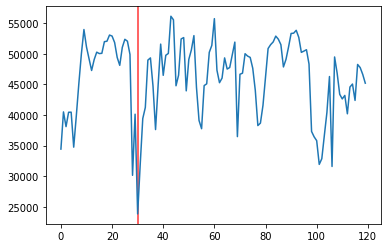

In [5]:
from scipy.stats import norm, zscore
import math
import banpei

scores = banpei.Hotelling().detect(carts_network_transmit_bytes_total, 0.01)
for i, score in scores:
    plt.axvline(i, color='r', alpha=0.8)
plt.plot(carts_network_transmit_bytes_total)

(array([ 1.,  1.,  4.,  6.,  9., 11., 17., 27., 35.,  9.]),
 array([23834.3671 , 27061.93632, 30289.50554, 33517.07476, 36744.64398,
        39972.2132 , 43199.78242, 46427.35164, 49654.92086, 52882.49008,
        56110.0593 ]),
 <BarContainer object of 10 artists>)

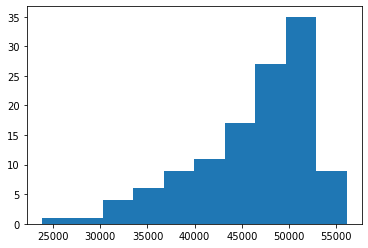

In [6]:
plt.hist(carts_network_transmit_bytes_total)

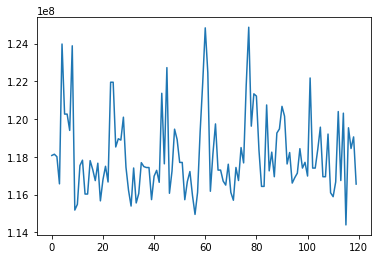

In [49]:
import banpei

smoothed_front_end_memory_usage_bytes = tsdr.smooth_with_ma(front_end_memory_usage_bytes, tsifter_step1_ma_window_size=6)
scores = banpei.Hotelling().detect(smoothed_front_end_memory_usage_bytes, 0.01)
for i, score in scores:
    plt.axvline(i, color='r', alpha=0.6)
plt.plot(front_end_memory_usage_bytes)

(array([ 4., 19., 37., 24., 13.,  8.,  4.,  7.,  0.,  4.]),
 array([1.14393088e+08, 1.15440026e+08, 1.16486963e+08, 1.17533901e+08,
        1.18580838e+08, 1.19627776e+08, 1.20674714e+08, 1.21721651e+08,
        1.22768589e+08, 1.23815526e+08, 1.24862464e+08]),
 <BarContainer object of 10 artists>)

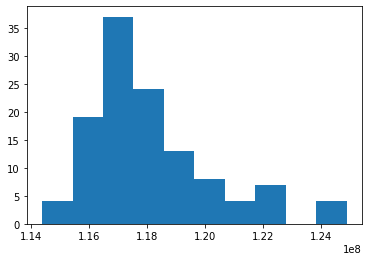

In [8]:
plt.hist(front_end_memory_usage_bytes)

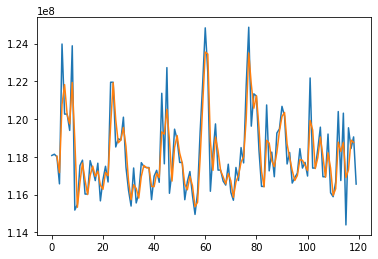

In [55]:
ar = AROutlierDetector(np.array(front_end_memory_usage_bytes))
ar.fit(regression='n', ic='bic')
in_preds, sig2 = ar.predict_in_sample()
in_pred_lag = ar._lag
plt.plot(front_end_memory_usage_bytes)
plt.plot(in_pred_lag * [np.NaN] + list(in_preds))

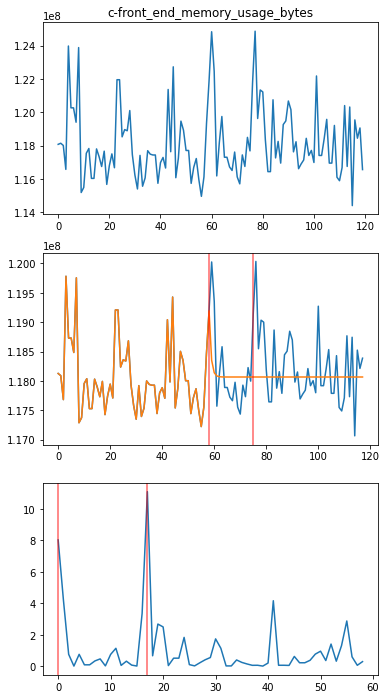

In [58]:
ar = AROutlierDetector(np.array(front_end_memory_usage_bytes))
ar.fit(regression='c', ic='bic')
in_preds, sig2 = ar.predict_in_sample()
in_pred_lag = ar._lag

train, test = np.split(in_preds, indices_or_sections=[int(len(in_preds) // 2)])

ar = AROutlierDetector(train)
ar.fit(regression='c', ic='bic')
preds, sig2 = ar.predict_out_of_sample(test.size)
scores = ar.anomaly_scores_out_of_sample(test)

fig, axs = plt.subplots(3, ncols=1)
fig.set_size_inches(6, 4*3)
axs = axs.flatten()
axs[0].plot(front_end_memory_usage_bytes)
axs[0].set_title('c-front_end_memory_usage_bytes')
axs[1].plot(list(in_preds))
axs[1].set_title('c-front_end_memory_usage_bytes')
con = np.concatenate([train, preds])
axs[1].plot(con)
axs[2].plot(scores)

outliers, abn_th = ar.detect_by_fitting_dist(scores, 0.01)
for i, score in outliers:
    axs[2].axvline(i, color='r', alpha=0.6)
    axs[1].axvline(train.size+i-1, color='r', alpha=0.6)

In [ ]:



train, test = np.split(np.array(front_end_memory_usage_bytes), 2)

ar = AROutlierDetector(train)
ar.fit(regression='c', ic='bic')
preds, sig2 = ar.predict_out_of_sample(test.size)
scores = ar.anomaly_scores_out_of_sample(test)

fig, axs = plt.subplots(2, ncols=1)
fig.set_size_inches(9, 4*3)
axs = axs.flatten()
axs[0].plot(front_end_memory_usage_bytes)
con = np.concatenate([train, preds])
axs[0].plot(con)
axs[1].plot(scores)

outliers, abn_th = ar.detect_by_fitting_dist(scores, 0.01)
for i, score in outliers:
    axs[1].axvline(i, color='r', alpha=0.6)
    axs[0].axvline(train.size+i-1, color='r', alpha=0.6)

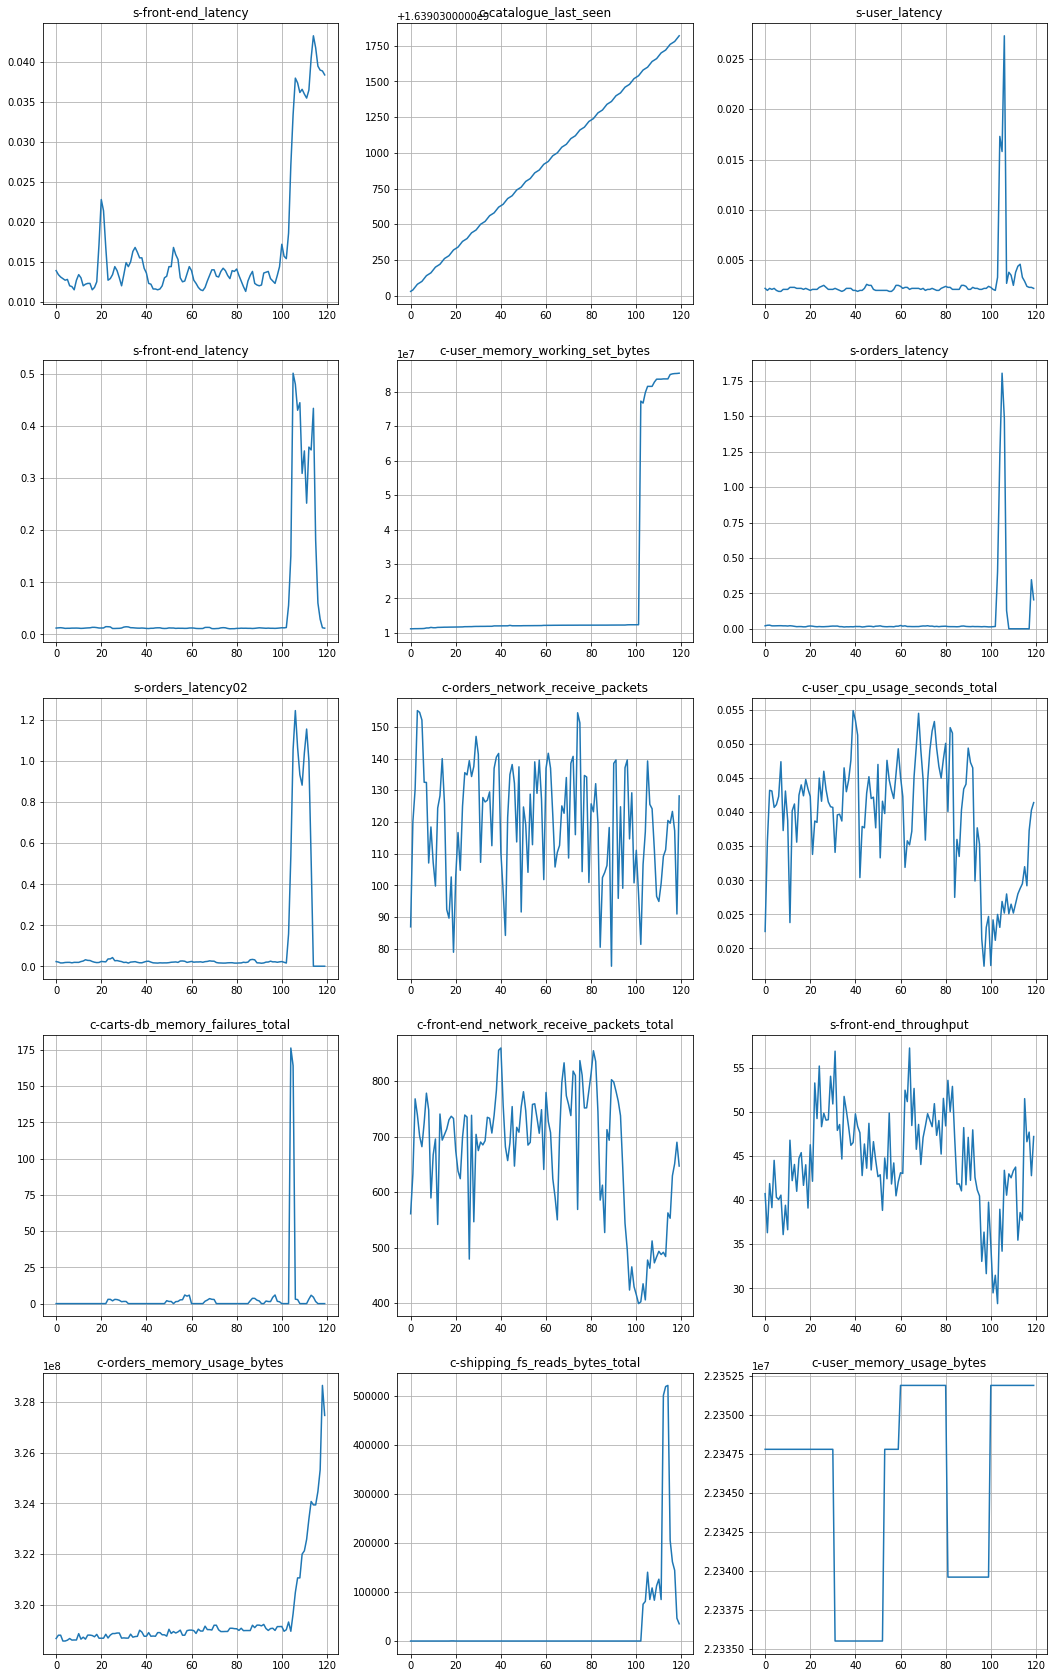

In [10]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//3, ncols=3)
fig.set_size_inches(18, 2*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ax.grid()
    ax.set_title(case['name'])
    ax.plot(case['datapoints'])